# 5 dimensions of human personality

### Purpose of the project
We want to investigate the way people can fake their responses into a questionnaire for obtaining a job or a specific role. In addition we want to model data making possible to detect liers and to remove the bias caused by the aim to appear  more suitable for the role.

### Data collection
In this experiment participants were required to respond to the same questionnaire twice. First, they were asked to respond honestly to all of its questions. Then, they were instructed them to fake their responses for a **role in a Humanitarian Organization**. We have the same subject responding in an honest condition and in one of instructed faking. Participants were asked to respond to the same set of 10 items twice, first honestly and then altering their answers to obtain a personal gain in the context described before. 

### Expectations
We expect liars will give higher responses than truth-tellers because they have to appear in a better light and more suitable for the role.

In [4]:
# import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# import and show dataframe
data = pd.read_csv('BF_df_CTU.csv')
n,p = data.shape # extract dimensions

print(f"We have {n//2} respondents that took questionnaire twice, in H (Honest) and D (Dishonest) condition")
data.head()

We have 221 respondents that took questionnaire twice, in H (Honest) and D (Dishonest) condition


,EX1G,EX2G,A1G,A2G,C1G,C2G,ES1G,ES2G,O1G,O2G,CONDITION
0,4,4,4,4,4,5,4,4,4,4,H
1,4,2,2,4,4,5,3,4,4,4,H
2,4,2,2,4,4,4,3,4,4,4,H
3,4,2,2,4,2,4,5,5,4,2,H
4,3,2,3,4,5,5,4,4,5,5,H


In [10]:
# divide data in H and D
x_real = data.iloc[:n//2,:-1]
x_fake = data.iloc[n//2:,:-1]

In [11]:
# randomly choose 80% train, 10% validation, 10% test set
np.random.seed(0) # make reults reproducible
index = np.random.choice([0,1,2], size=n//2, p=[0.8,0.1,0.1]) # sample random groups of indexes

x_real_smalltrain = x_real[index==0]
x_real_val = x_real[index==1]
x_real_test = x_real[index==2]

x_fake_smalltrain = x_fake[index==0]
x_fake_val = x_fake[index==1]
x_fake_test = x_fake[index==2]

# create a full train test (that contains validation data) for final model training before test part
x_real_train = x_real[index!=2]
x_fake_train = x_fake[index!=2]

## Exploratory analysis
In which way people are faking?
Let's plot some example of the true vs the fake responses of the same subject!

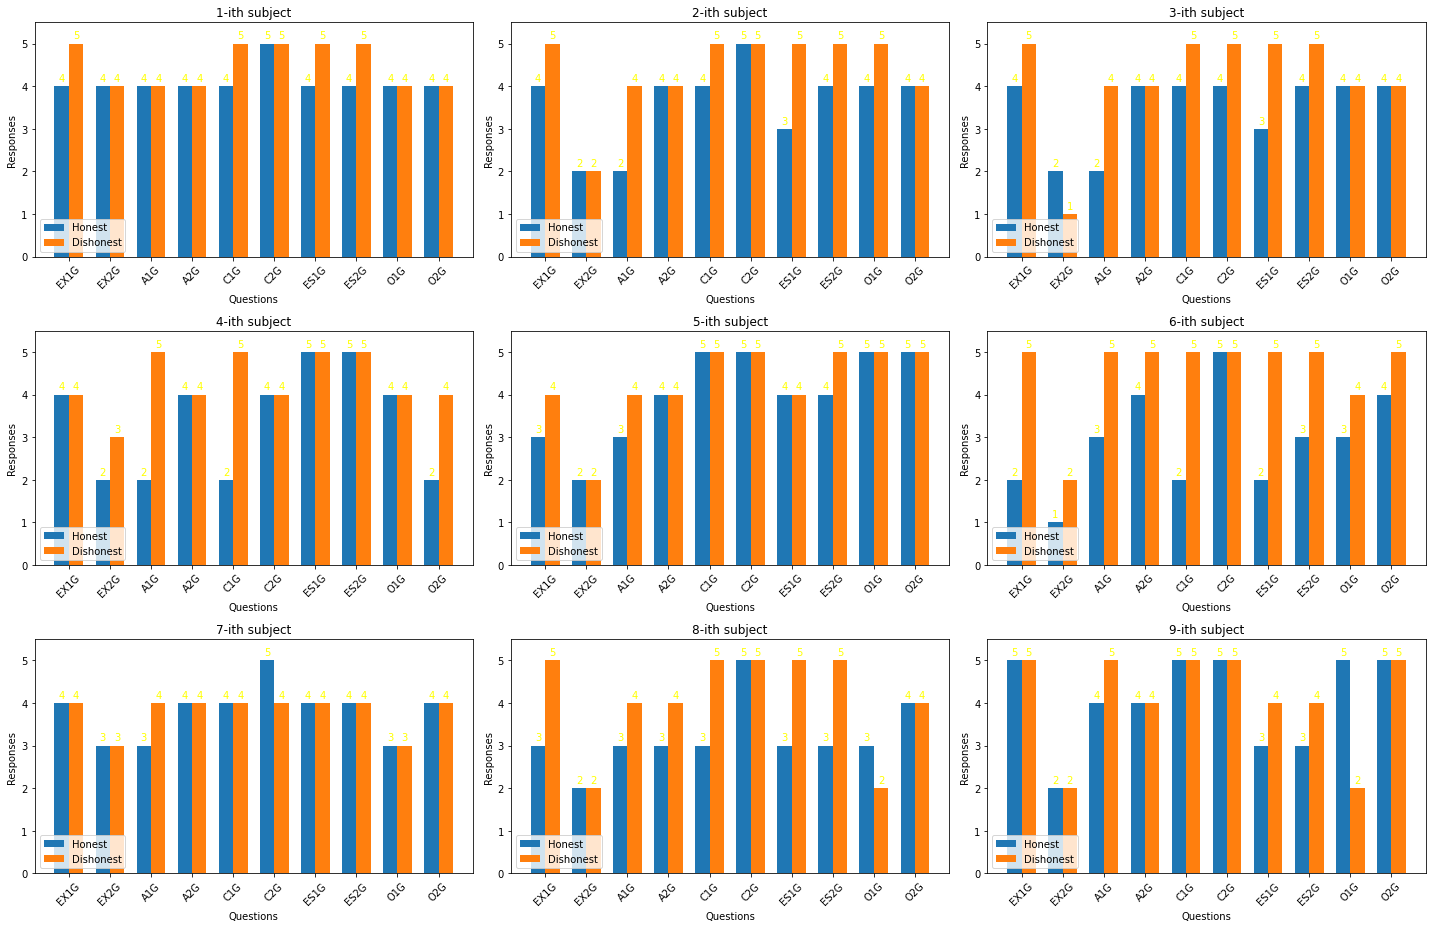

In [23]:
fig, ax = plt.subplots(3,3, figsize=(20, 13))

for i in range(9):

    row = int(i/3)
    col = i % 3

    labels = list(data.columns[:-1])

    honest = list(data.iloc[i,:-1])
    lier = list(data.iloc[n//2 + i,:-1])

    x = np.arange(len(labels))  
    width = 0.35  

    rects1 = ax[row, col].bar(x - width/2, honest, width, label='Honest')
    rects2 = ax[row, col].bar(x + width/2, lier, width, label='Dishonest')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax[row, col].set_title(str(i+1) + "-ith subject")
    ax[row, col].set_ylabel('Responses')
    ax[row, col].set_xlabel('Questions')
    ax[row, col].set_xticks(x)
    ax[row, col].set_xticklabels(labels, rotation=45)
    ax[row, col].legend(bbox_to_anchor=(0,0), loc="lower left")
    ax[row, col].set_ylim([0,5.5])

    def autolabel(rects):
        """Attach a text label above each bar, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax[row, col].annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

fig.tight_layout()

plt.show()

What the different questions mean? (For this reason we decided to call this project *"5 dimensions of Human Personality"*)
- EX = Extroversion scale
- A = Agreeableness scale
- C = Consciousness scale
- ES = Emotional stability scale 
- O = Openness scale

Now let's see the mean of the differences among all subjects!

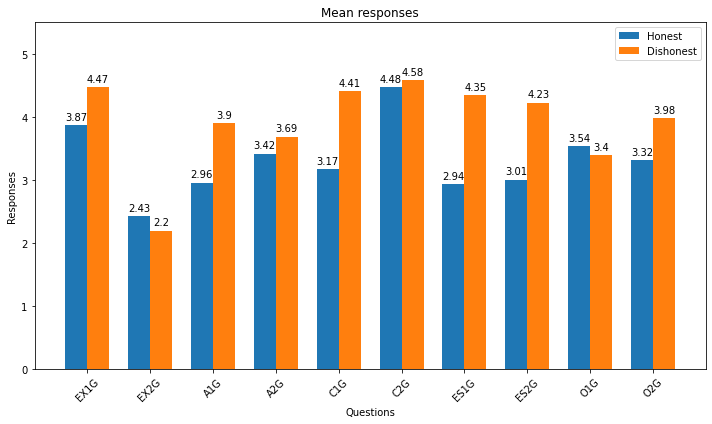

In [24]:
fig, ax = plt.subplots(1,1, figsize=(10, 6))

labels = list(data.columns[:-1])

honest = list(x_real.mean(0).round(2))
lier = list(x_fake.mean(0).round(2))

x = np.arange(len(labels))  
width = 0.35  

rects1 = ax.bar(x - width/2, honest, width, label='Honest')
rects2 = ax.bar(x + width/2, lier, width, label='Dishonest')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title("Mean responses")
ax.set_ylabel('Responses')
ax.set_xlabel('Questions')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(bbox_to_anchor=(1,1), loc="upper right")
ax.set_ylim([0,5.5])

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Looking deeper into questions we can make some hypotesis on the way how people are faking responses

I see myself as someone who ...
- EX
    - is outgoing, sociable (extroversion);
    - is reserved (extroversion reversed);
- A
    - tends to find fault with others (agreeableness, reversed);    
    - is generally trusting (agreeableness);
- C
    - tends to be lazy (consciousness, reversed)
    - does a thorough job (consciousness)
- ES
    - gets nervous easily (emotional stability, reversed);
    - is relaxed, handles stress well (emotional stability);
- O
    - has an active imagination (openness);
    - has few artistic interests (openness, reversed).

## Classification of fake questionnaires
In this modelling part of the project we try to find faked questionnaires looking at responses, we'll use an interpretable model such as a **sparse** version of **regularized logistic regression**. In this way we can get insights about what are the responses that more discriminates between Honest and Dishonest. 

In [25]:
# create target and explanatory variables
y = np.array([1 if c == "D" else 0 for c in data["CONDITION"]]) # create response array
X = data.iloc[:,:-1].copy() # make a copy of dataset removing last column

In [28]:
# split train and test data for good evaluation of the model, test size 10% of total 442 samples
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [29]:
# fit logistic regression with est regularization parameters on train set
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=124, verbose=False, penalty="l1", solver="saga", max_iter=3000, C = 0.1)
_ = LR.fit(X_train, y_train)

In [30]:
# make predictions and calculate accuracy score of classification
from sklearn.metrics import accuracy_score

y_hat = LR.predict(X_test)
print(f"Accuracy of regularized logistic regression: {accuracy_score(y_hat, y_test).round(2)}" ) 
print(f"There were {sum(y_hat != y_test)} errors on {len(y_test)} predictions")


Accuracy of regularized logistic regression: 0.91
There were 4 errors on 45 predictions


### Results exploration
The high accuracy ensures that the model behaviour is good for our pourpuses, but it's not the only thing we care about. In fact we need to inspect what are the most faked responses in order to appear on a better light fot the **role in Humanitarian Organization**.

The **following plot** helps us to understand what are the most faked questions and how the model coefficients are significative.


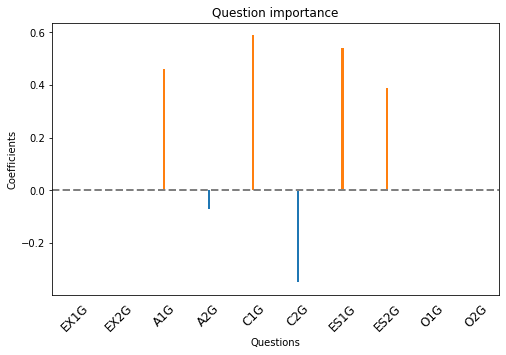

In [34]:
fig, ax = plt.subplots(figsize=(8, 5))

coef_df = pd.DataFrame({"varname" : list(data.columns)[:-1],
                        "coef" : LR.coef_.round(2)[0]})

coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', legend=False)
ax.set_xlabel('Questions')
ax.set_ylabel('Coefficients')
ax.set_title("Question importance")
ax.axhline(y=0, linestyle='--', color='gray', linewidth=2)

ax.bar(x=np.arange(coef_df.shape[0]), width=0.05,
           height=coef_df['coef'], color=["tab:blue" if c < 0 else "tab:green" if c == 0 else "tab:orange" for c in coef_df['coef']])

ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(list(data.columns)[:-1], 
                       rotation=45, fontsize=12)



As we can see the model does not watch EX (Extrovertion) and O (Opensess) for discriminating between honests and liers. 

C and ES seem to be the questions where the liers tend to fake more. A is also faked, in particular the "*tends to find fault with others*" question.

### Wath are the wrong predictions?
We can plot them for a better focus on why the model classificated thos questionnaires wrong. 

In [35]:
# print misclassified examples

print("Misclassifications:")
errors = X_test.join(data["CONDITION"]).join(pd.Series(["D" if c == "H" else "H" for c in data["CONDITION"]], name="Prediction")).iloc[y_hat != y_test,:]
errors

Misclassifications:


,EX1G,EX2G,A1G,A2G,C1G,C2G,ES1G,ES2G,O1G,O2G,CONDITION,Prediction
116,5,2,2,4,5,5,5,4,3,2,H,D
79,5,2,4,3,5,4,3,3,2,3,H,D
75,4,1,5,3,2,5,5,4,5,3,H,D
199,5,1,4,5,5,5,5,5,5,5,H,D


### Comparison between misclassifications and typical behavior

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


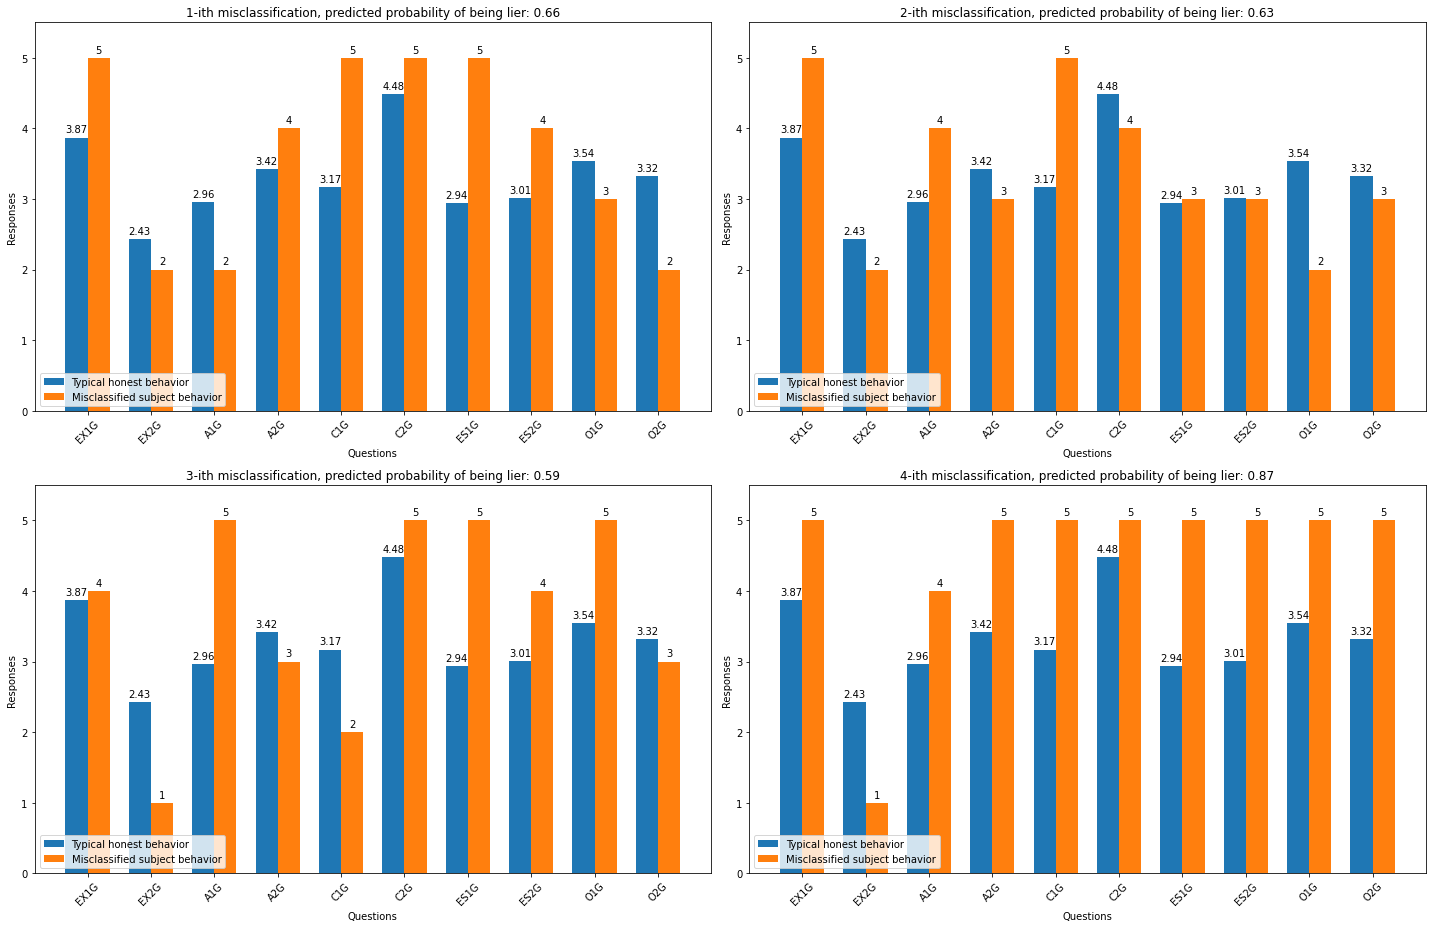

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(20, 13))

for i in range(4):

    row = int(i/2)
    col = i % 2

    labels = list(data.columns[:-1])

    honest = list(x_real.mean(0).round(2))
    errs = list(errors.iloc[i, :-2])

    x = np.arange(len(labels))  
    width = 0.35  

    rects1 = ax[row, col].bar(x - width/2, honest, width, label='Typical honest behavior')
    rects2 = ax[row, col].bar(x + width/2, errs, width, label='Misclassified subject behavior')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax[row, col].set_title(str(i+1) + "-ith misclassification, predicted probability of being lier: " + 
                           str(LR.predict_proba(np.array(errs).reshape((1,-1))).round(2)[0,1])  )
    ax[row, col].set_ylabel('Responses')
    ax[row, col].set_xlabel('Questions')
    ax[row, col].set_xticks(x)
    ax[row, col].set_xticklabels(labels, rotation=45)
    ax[row, col].legend(bbox_to_anchor=(0,0), loc="lower left")
    ax[row, col].set_ylim([0,5.5])

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax[row, col].annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

fig.tight_layout()

plt.show()

The model is correcly spotting the liers, but in few examples it classifies honest people, with non-typical behavior, as liers.

We notice that all misclassified examples are Honest questionnaires that were classified Dishonest. Maybe because of the fact that people responding to the questionnaire in first time didn't know that, in a second time, they were forced to fake good the questionnaire and thay already gave extremely high responses.

## Adjust faked questionnaires to honest

We will compare different approaches for infering the honest responses given a faked questionnaire:
- Naive approach for baseline
- Denoising autoencoder
- Tree Based Regression (XGBoost)

### Naive approach

All the proposed method should outperform the trivial strategy of subtracting to each subject faked response the average of the difference, across all subjects, among faked and honest response.

In [42]:
# calculate the mean of the differences between faked and real response
mean_train = (x_fake_train.to_numpy() - x_real_train.to_numpy()).mean(axis=0)

# predict the real Test Set response subtractin the mean from the fake responses
x_real_test_predicted = x_fake_test.to_numpy() - mean_train

# calculate the MSE on Test Set
test_mse = ((x_real_test_predicted - x_real_test.to_numpy()) **2).mean()
test_mae = (abs(x_real_test_predicted - x_real_test.to_numpy())).mean()
print(f"Naive approach: \n MSE metric: {test_mse.round(3)} \n MAE metric: {test_mae.round(3)}")

Naive approach: 
 MSE metric: 1.286 
 MAE metric: 0.845


With this basic approach, that we'll usa as a baseline, we have a Mean Absolute Error of 0.84. 
This means that we are able to predict Honest responses with a mean error of 0.84 points for each response. 

### Denoising autoencoder

In [33]:
dim_1 = 10
dim_2 = 5

input_vector = tf.keras.layers.Input(shape=(10,))

# Define the encoder
hidden_1 = tf.keras.layers.Dense(dim_1, activation='sigmoid')(input_vector)
encoded = tf.keras.layers.Dense(dim_2, activation='sigmoid')(hidden_1)

# ...and the decoder...
hidden_2 = tf.keras.layers.Dense(dim_1, activation='sigmoid')(encoded)
decoded = tf.keras.layers.Dense(10, activation='linear')(hidden_2)

# and finally the autoencoder
autoencoder = tf.keras.models.Model(inputs=input_vector, outputs=decoded)

autoencoder.compile(optimizer='sgd', loss='mse')

In [34]:
# show autoencoder structure
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 335
Trainable params: 335
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = autoencoder.fit(x_fake_train, x_real_train, epochs=200, shuffle=True, validation_data=(x_fake_val, x_real_val),  verbose = False)

In [36]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'])
  plt.plot(history.epoch,history.history['val_loss'])
  plt.legend(["Loss", "Val_loss"])
  plt.title('loss')

1/1 - 0s - loss: 1.0371
test mse: 1.03710


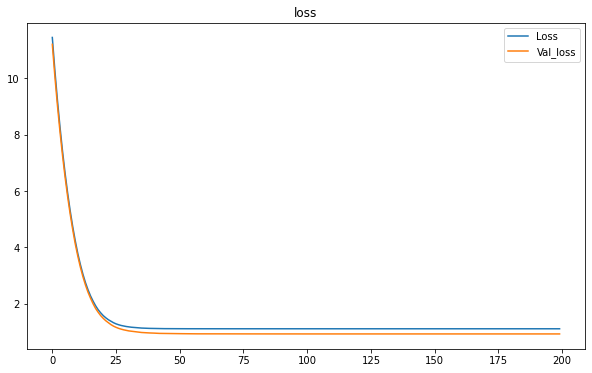

In [37]:
plot_loss(history)

scores = autoencoder.evaluate(x_fake_test, x_real_test, verbose=2)
print("test mse: %.5f" % (scores))

In [38]:
test_mse = ((autoencoder.predict(x_fake_test) - x_real_test.to_numpy())**2).mean()
test_mse

1.0371046847747238